In [614]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlite3
import matplotlib.pyplot as plt


# Reflect Tables into SQLAlchemy ORM

In [615]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [616]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")



In [617]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [618]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [619]:
# Assign the measurement class to a variable called `Measurement` and the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [620]:
# Create session and how it connects
session = Session(engine)
conn = engine.connect()

In [621]:
from sqlalchemy import text
query = text("""SELECT * from station limit 10""")
dataframe_one = pd.read_sql(query, con=conn)
print(dataframe_one.shape)
dataframe_one


(9, 6)


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [622]:
# Find the most recent date in the data set.
query = text("""SELECT max(date) from measurement;""")
conn.execute(query).fetchall()

[('2017-08-23',)]

In [623]:
session.query(func.max(measurement.date)).all()

[('2017-08-23',)]

In [624]:
# ORM 
rows = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').order_by(measurement.date).all()
df1 = pd.DataFrame(rows)
df1 = df1.sort_values(by="date")
df1.head()

,id,station,date,prcp
0,2364,USC00519397,2016-08-23,0.00
1,5091,USC00513117,2016-08-23,0.15
2,7331,USC00514830,2016-08-23,0.05
3,8825,USC00517948,2016-08-23,NaN
4,11851,USC00519523,2016-08-23,0.02


<Figure size 1000x1200 with 0 Axes>

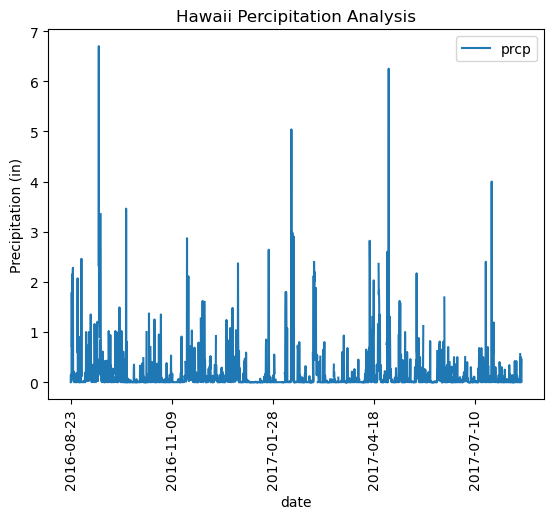

In [625]:
plt.figure(figsize=(10,12))
df1.plot(x="date", y="prcp")
plt.title("Hawaii Percipitation Analysis")
plt.ylabel("Precipitation (in)")
plt.xticks(rotation=90) 
plt.show()

# Exploratory Station Analysis

In [626]:
# Design a query to calculate the total number of stations in the dataset
df1.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [627]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("""SELECT count(station) from station;""")
conn.execute(query).fetchall()

[(9,)]

In [628]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text("""SELECT min(tobs) as min_tobs, max(tobs) as max_tobs, avg(tobs) as avg_tobs FROM measurement WHERE station = 'USC00519281';""")
df3 = pd.read_sql(query, con=conn)
df3.head(10)

,min_tobs,max_tobs,avg_tobs
0,54.0,85.0,71.663781


In [629]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


,id,station,date,tobs
0,14608,USC00519281,2016-08-23,77.0
1,14609,USC00519281,2016-08-24,77.0
2,14610,USC00519281,2016-08-25,80.0
3,14611,USC00519281,2016-08-26,80.0
4,14612,USC00519281,2016-08-27,75.0


# Close Session

In [630]:
# Close Session
session.close()
